# Part 1
## Review on Linear Algebra in Python
In this section of the notebook we would like to introduce you to the linear algebra library in python. For a more detailed overview of each covered concept please read this https://www.deeplearningbook.org/contents/linear_algebra.html


In [58]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
# Here is a glimpse of how we can create matrices
A = np.array([[1, 2, 3], [3, 4, 5]])
B = np.array([[0, 1],[3, 5], [3, 1]])
v = np.array([5, 6, 7])
C = np.vstack((A, v))
I = np.eye(3) # an identity matrix
D = np.array([[-2, 1, 0], [1, -2, 1],[0, 1, -2]]) # a symmetrical matrix
Q = np.array([[2, -2, 1],[1, 2, 2],[2, 1, -2]])*1/3 # an orthogonal matrix

print(A)
print(B)
print(v)
print(C)
print(D)
print(I)
print(Q)


[[1 2 3]
 [3 4 5]]
[[0 1]
 [3 5]
 [3 1]]
[5 6 7]
[[1 2 3]
 [3 4 5]
 [5 6 7]]
[[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[ 0.66666667 -0.66666667  0.33333333]
 [ 0.33333333  0.66666667  0.66666667]
 [ 0.66666667  0.33333333 -0.66666667]]


In [60]:
# Matrix transpose
print(A.shape)
print(A.T)
print(A.T.shape)

(2, 3)
[[1 3]
 [2 4]
 [3 5]]
(3, 2)


In [61]:
# Elementwise multiplication
print(np.multiply(A,v))
print(A*v)
print(np.multiply(A,A))
print(A**2)
print(A*2)


[[ 5 12 21]
 [15 24 35]]
[[ 5 12 21]
 [15 24 35]]
[[ 1  4  9]
 [ 9 16 25]]
[[ 1  4  9]
 [ 9 16 25]]
[[ 2  4  6]
 [ 6  8 10]]


In [62]:
# Dot product between a matrix and a vector.
print(A.shape, v.shape)
print(A.dot(v))

(2, 3) (3,)
[38 74]


In [63]:
# Matrix multiplication: dot product between two matrices
# Remember, the dimensions of the matrices must be aligned
# In the following example, the dimension of C is 3X3 and A is 2X3, 
# to multiply the matrices we need to transpose A first.
print(C.dot(A.T))
print(np.matmul(C, A.T))
# If the shapes of the matrices are not aligned, then python will make sure to complain
print(C.dot(A))


[[14 26]
 [26 50]
 [38 74]]
[[14 26]
 [26 50]
 [38 74]]


ValueError: shapes (3,3) and (2,3) not aligned: 3 (dim 1) != 2 (dim 0)

In [64]:
# Matrix determinant
print(la.det(C))
# Python will complain if the given matrix is singular (determinant is 0)
print(la.inv(C))

-4.4408920985006143e-16
[[ 4.50359963e+15 -9.00719925e+15  4.50359963e+15]
 [-9.00719925e+15  1.80143985e+16 -9.00719925e+15]
 [ 4.50359963e+15 -9.00719925e+15  4.50359963e+15]]


In [65]:
# The symmetric matrix that is guaranteed to have a non-zero determinant
print(D)
print(np.allclose(D, D.T)) # To verify that the transpose of D is indeed equal to D
print(la.det(D))
print(la.inv(D))

[[-2  1  0]
 [ 1 -2  1]
 [ 0  1 -2]]
True
-4.0
[[-0.75 -0.5  -0.25]
 [-0.5  -1.   -0.5 ]
 [-0.25 -0.5  -0.75]]


In [66]:
# Decomposing a symmetric matrix into a set of eigenvectors and eigenvalues. 
# eigvecs contains the normalized (unit “length”) eigenvectors,
# such that the column eigvecs[:,i] is the eigenvector corresponding to the eigenvalue eigvals[i].
eigvals, eigvecs = la.eig(D)
print(eigvals)
print(eigvecs)
np.allclose(np.dot(eigvecs[0],eigvecs[1]),0)  # note that eigenvectors are orthogonal

[-3.41421356 -2.         -0.58578644]
[[ 5.00000000e-01  7.07106781e-01  5.00000000e-01]
 [-7.07106781e-01 -4.05925293e-16  7.07106781e-01]
 [ 5.00000000e-01 -7.07106781e-01  5.00000000e-01]]


True

### Your turn: practice Linear Algebra using Python


Task 1: Compute $M = 3C^3 - 5(A^TB^T)^2$. The correct answer is [[  -42, -1596,   -99],
       [    1, -3188,  -125],
       [  250, -5132,    49]]

In [67]:
M = 3*(C**3) - 5* (np.matmul(A.T, B.T)**2)
print(M)

[[  -42 -1596   -99]
 [    1 -3188  -125]
 [  250 -5132    49]]


Task 2: Which of these matrices are equal?
$(CD)^T, C^TD^T,D^TC^T,(DC)^T, CD^T$. Verify by computing each of the resulting matrices.


In [68]:
M = np.matmul(C.T, D.T)
N = (np.matmul(D, C)).T
print(np.allclose(M,N))
print(M)
print(N)


True
[[ 1  0 -7]
 [ 0  0 -8]
 [-1  0 -9]]
[[ 1  0 -7]
 [ 0  0 -8]
 [-1  0 -9]]


In [69]:
E = (np.matmul(C, D)).T
F = np.matmul(D.T, C.T)
print(np.allclose(E,F))
print(E)
print(F)

True
[[ 0 -2 -4]
 [ 0  0  0]
 [-4 -6 -8]]
[[ 0 -2 -4]
 [ 0  0  0]
 [-4 -6 -8]]


In [70]:
print(np.matmul(C, D.T))

[[ 0  0 -4]
 [-2  0 -6]
 [-4  0 -8]]


Task 3: Using np.allclose(), verify that $inv(D)$ is the inverse of $D$ by showing that $inv(D)\ D == D\ inv(D)== I$. 

In [71]:
print(np.allclose(D, D.T, I))

True


Task 4: Using np.allclose(), verify that $Q$ is an orthogonal matrix by showing $QQ^T ==Q^TQ == I $

In [72]:
print(np.allclose(np.matmul(Q, Q.T), np.matmul(Q.T, Q), I))

True


### A covariance matrix and its eigen decomposition.
Suppose we have two random variables X and Y. The covariance $C(X,Y)$ is a matrix that quantifies the joint variability between these variables. The matrix is always square and symmetric: the diagonal entries of the covariance matrix are the variances of each variable and the other entries are the covariances. As the result it defines both the spread (variance), and the orientation (covariance) of our data. Remember, variance can only be used to explain the spread of the data in the directions parallel to the axes of the feature space.

The eigenvalue decomposition (EVD) of covariance matrix is defined as: $C=VLV^T$, where $V$ is a matrix of orthonormal eigenvectors of $C$ and $L$ is a diagonal matrix of corresponding eigenvalues.

The eigenvectors of the covariance matrix point in the direction of the spread of the data. In particular, the largest eigenvector of the covariance matrix always points into the direction of the largest variance of the data, and the magnitude of this vector equals the corresponding eigenvalue.  

The example below illustrates that when the covariance matrix is a diagonal matrix, i.e. variables are uncorrelated, the eigenvalues are equal to the variances since the covariances are zero. 

[7. 1.]
[[1. 0.]
 [0. 1.]]


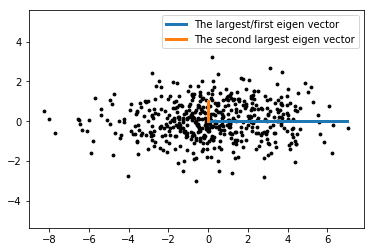

In [73]:
cov = np.array([[ 7, 0], [0,  1]]) 
mean = np.array([0, 0])
# sampling from a 2D gaussian ditribution with a set mean and cov matrix
data = np.random.multivariate_normal(mean, cov, 500).T
x = data[0]
y = data[1]
plt.scatter(x, y, s = 8, c = 'k')
plt.axis('equal')

# plotting the direction of the eigenvectors
eigvals_c, eigvecs_c = la.eig(cov)
print(eigvals_c)
print(eigvecs_c)
scaled_eigen_vecs_c = np.multiply(eigvecs_c, eigvals_c)
v1 = np.vstack((mean,scaled_eigen_vecs_c[:,0])).T
v2 = np.vstack((mean,scaled_eigen_vecs_c[:,1])).T
plt.plot(v1[0], v1[1], linewidth=3, label = "The largest/first eigen vector")
plt.plot(v2[0], v2[1], linewidth=3, label = "The second largest eigen vector")
plt.legend()
plt.show()

#### Correlated variables
If the covariance matrix is not diagonal, such that the covariances are not zero, the eigenvalues still represent the variance magnitude in the direction of the largest spread of the data, and the variance components of the covariance matrix still represent the variance magnitude in the direction of the x-axis and y-axis. But since the data is not axis aligned, these values are not the same anymore.


[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
[0 0]


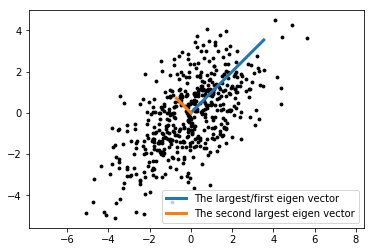

In [88]:
cov = np.array([[ 3, 2], [2,  3]]) 
mean = np.array([0, 0])
# sampling from a 2D gaussian ditribution with a set mean and cov matrix
data = np.random.multivariate_normal(mean, cov, 500).T
x = data[0]
y = data[1]
plt.scatter(x, y, s = 8, c = 'k')
plt.axis('equal')

# plotting the direction of the eigenvectors
eigvals_c, eigvecs_c = la.eig(cov)
print(eigvals_c)
print(eigvecs_c) 
scaled_eigen_vecs_c = np.multiply(eigvecs_c, eigvals_c)
print(mean)
v1 = np.vstack((mean,scaled_eigen_vecs_c[:,0])).T
v2 = np.vstack((mean,scaled_eigen_vecs_c[:,1])).T
plt.plot(v1[0], v1[1], linewidth=3, label = "The largest/first eigen vector")
plt.plot(v2[0], v2[1], linewidth=3, label = "The second largest eigen vector")
plt.legend()
plt.show()

## Implementing Principal Component Analysis (PCA) using Eigen Decomposition (EVD) 

Principal component analysis(PCA) is a technique that is widely used for applications such as dimensionality reduction, feature extraction and data visualization. There are two definitions of PCA: 1. An orthogonal projection of the data onto a lower dimensional linear subspace, known as linear subspace, such that the variance of the projected data is maximized; 2. A linear projection that minimizes the average projection cost, defined as mean square distance between the data points and their projections.

Consider a data set of observations in a matrix form  $X$  with dimension  $n \times d$  ( $n$  is the number of samples, and  $d$  is the dimension of each sample or the number of features in each sample). We want to project our data onto a space of dimension  $k$ , where  $k<d$ , while maximizing the variance of the projected data. To do so, we need to find linearly uncorrelated axes/features which are also known as principal components(PC).

PCs can be found by eigenvalue decomposition(EVD) of the covariance matrix  $C = \frac{X^TX}{n-1}$, where $X$ is centered. By the definition of EVD, since $C$  is square and symmetric it can be rewritten as $C = VLV^T$, where  $V$  is a matrix of orthonormal eigenvectors of  $C$  and  $L$  is a diagonal matrix of corresponding eigenvalues. As we discussed earlier, these eigenvectors point in the direction of the spread of the data and the largest one points in the direction of the largest variance in the data. Thus, these vectors are the principal axes we need in order to find the PCs. 

Finally, we compute the PCs by performing the dot product $X \cdot V$.
If we want to find the projection to a  𝑘  dimensional space, then we need to select those principal components that correspond to the $k$ largest eigen values.

In [75]:
# Store Iris dataset into the dataframe from the url source
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal.length','sepal.width','petal.length','petal.width','variety']
df_iris = pd.read_csv(url, names=names)
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Task 1: Create a dataframe called ***df_petal*** such that it contains only those entries of **petal_length** and **petal_width** features, where the variety is either Iris-versicolor or Iris-virginica. Then make a scatter plot to show the correlation between these 2 features.

In [76]:
df1 = df_iris[(df_iris['variety']=='Iris-versicolor') | (df_iris['variety']=='Iris-virginica')]
df_petal = df1[['petal.length', 'petal.width']]
df_petal


,petal.length,petal.width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
55,4.5,1.3
56,4.7,1.6
57,3.3,1.0
58,4.6,1.3
59,3.9,1.4


(2.800353539669622, 7.099646460330377, 0.9178456819416371, 2.582154318058363)

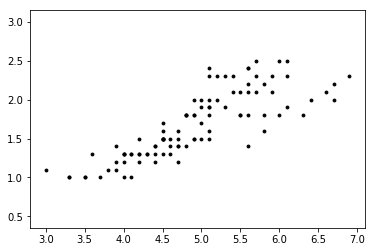

In [77]:

x = df_petal['petal.length']
y = df_petal['petal.width']

plt.scatter(x, y, s = 8, c = 'k')
plt.axis('equal')


Task 2: Center the **df_petals** (subtract the mean of each variable from the dataset to center the data around the origin) and store the result in a new dataframe **df_petals_norm**.Then make a scatter plot to show the correlation between the two features. The arragements of the data points should look the same, but they will shift and with the center at (0,0). 

(-2.105646460330378,
 2.193646460330377,
 -0.7581543180583632,
 0.9061543180583622)

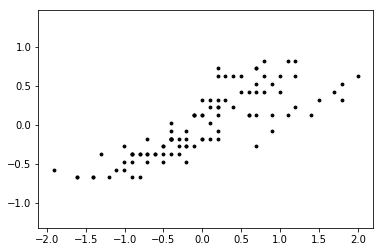

In [78]:
df_petals_norm = df_petal  - df_petal[['petal.length', 'petal.width']].mean()
df_petal[['petal.length', 'petal.width']].mean()
x1 = df_petals_norm['petal.length']
y1 = df_petals_norm['petal.width']

plt.scatter(x1, y1, s = 8, c = 'k')
plt.axis('equal')

Task 3: Using numpy functions, find the covariance matrix for **df_petals_norm** in accordance with the formula and store it in **cov**.

In [79]:
cov1 = np.cov(df_petals_norm)
cov1

array([[ 0.00245, -0.00805,  0.00595, ..., -0.00105, -0.00455,  0.00245],
       [-0.00805,  0.02645, -0.01955, ...,  0.00345,  0.01495, -0.00805],
       [ 0.00595, -0.01955,  0.01445, ..., -0.00255, -0.01105,  0.00595],
       ...,
       [-0.00105,  0.00345, -0.00255, ...,  0.00045,  0.00195, -0.00105],
       [-0.00455,  0.01495, -0.01105, ...,  0.00195,  0.00845, -0.00455],
       [ 0.00245, -0.00805,  0.00595, ..., -0.00105, -0.00455,  0.00245]])

In [82]:
X = np.stack((df_petals_norm['petal.length'], df_petals_norm['petal.width']), axis=0)
cov = np.cov(X)

We can also utilize pandas built-in function to compute the covariance matrix. If your result is correct, np.allclose should return True

In [83]:
cov_pandas = df_petals_norm.cov()
print(cov_pandas)
np.allclose(cov_pandas, cov) # ensure that two outputs are similar

              petal.length  petal.width
petal.length      0.681580     0.288731
petal.width       0.288731     0.180428


True

Task 4: Find the eigen decomposition of **cov**.

Then, sort eigenvalues and eigenvectors in the descending order of the eigenvalues. 

Lastly, make a scatter plot of the centered values and add the directions of the eigen vectors, as it was done for the covariance matrix of the gaussian distribution.

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


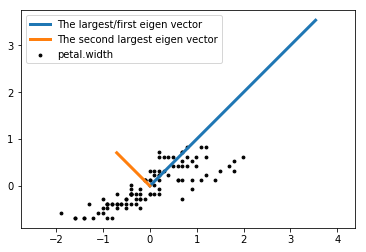

In [92]:
eigvals_c, eigvecs_c = la.eig(cov)


plt.scatter(x1, y1, s = 8, c = 'k')
plt.axis('equal')

idx = eigvals_c.argsort()[::-1]   
eigvals_c = eigvals_c[idx]
eigvecs_c = eigvecs_c[:,idx]


print(eigvals_c)
print(eigvecs_c) 
scaled_eigen_vecs_c = np.multiply(eigvecs_c, eigvals_c)
v1 = np.vstack((mean,scaled_eigen_vecs_c[:,0])).T
v2 = np.vstack((mean,scaled_eigen_vecs_c[:,1])).T
plt.plot(v1[0], v1[1], linewidth=3, label = "The largest/first eigen vector")
plt.plot(v2[0], v2[1], linewidth=3, label = "The second largest eigen vector")
plt.legend()
plt.show()

Task 5: Make a new dataframe **pc_df_petals** that holds the principal components of the data. To do so, project the data into principal axes (i.e. eigenvectors) using dot product. 

Then to illustrate that the principal components (i.e. 0 and 1) are indeed uncorrelated:
1. Print the covariance of the principal components.
2. Make a scatter plot of the principal components.

Hint: pandas has its own built-in function to perform dot product and compute a covariance matrix.

Your covariance matrix should have 0s or infinitesimal values in the secondary diagonal.

 

(-2.1801001109743785,
 2.2800849101064364,
 -0.6021784782401179,
 0.6411868697102935)

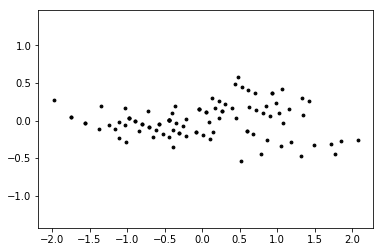

In [85]:
pc_df_petals = eigvecs_c.T.dot(df_petals_norm.T).T
a = df_petals_norm.dot(eigvecs_c)
x = pc_df_petals[:,0]
y = pc_df_petals[:,1]
plt.scatter(x, y, s = 8, c = 'k')
plt.axis('equal')

In [86]:
np.allclose(a,pc_df_petals)

True

Now we can verify that your produced principal components are correct by comparing with the result of sklearn implementation of PCA decomposition


In [87]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pc_sk = pca.fit_transform(df_petals_norm.values)
np.allclose(pc_sk,pc_df_petals)

True

# Part 2

### Dimensionality reduction
The dimensionality reduction is an important technique widely employed in data science.
For example, in order to visualize samples consisting of more than 3 features, we need to project them into lower dimensional space (e.g. 1, 2 or 3) with minimum loss of information.
Another example is when we want to remove highly correlated features from the dataset which are uninformative for machine learning algorithm. In addition, removing the correlated features will reduce the overhead on computationally intensive algorithms in terms of computational time, power and memory requirements.
For example, in gender prediction task, the 'tax paid' information of a person might be unnecceray, if the 'salary' information is given and tax is a fixed percentage of the salary.


In all aforementioned examples, we want to remove the uninfomrative part of the data with the minimum loss of information. This is exactly what PCA does by projecting the original data into principal axes of the covariance matrix. Recall that these principal axes are aligned with the direction of maximum variance.


Suppose the dimension of the original data is $d$, then we can reduce the dimensionality of the data to $k$ (assuming $k$ < $d$), by selecting $k$ first columns of the principal components. Here we assume that principal axes were sorted on the descending order of corresponding eigenvalues.


Task: We would like to reduce the dimension of df_petals to 1 and plot the results. To do so:
 
1.   Select the first column of **pc_df_petals** 
2.   Plot the histogram of these values colored by their true variety/class. Provide a legend.

The first 10 samples should look like this: array([[-0.30197514],
       [-0.44242689],
       [-0.07851029],
       [-0.98033575],
       [-0.35144774],
       [-0.52544   ],
       [-0.21896203],
       [-1.74170947],
       [-0.43446085],
       [-1.02980835]])


### Explained variance

In the current example, we are reducing the dimension of the data from 2 to 1. In many cases, the original dimension is much larger than 2 and we need to decide how many components are needed to capture the majority of variance in data. This number can be determined by looking at the cumulative explained variance ratio as a function of the number of components. To do that we first need to compute the explained variance ratio for each eigen value $\lambda_j$ as $\frac{\lambda_j}{\sum_{i=1}^d \lambda_i}$, where $d$ is the dimension of data. Then we can find cumulative sum of explained variance ratios.


Task: find the cumulative explained variance ratio using the pre-sorted eigen values. The correct answer is [0.94350037, 1.        ]. In other wods, 94.35% of variance in data should be attributed to the first principal component.

## Implementing PCA using SVD (brace yourself its a long read)

Let us to consider again $X$, the matrix that contains all of the normalized values in **df_petals_norm**.

We can get the singular value decomposition of $X$ as follows:

$X=USV^T$

where $U$ is a matrix of left-singular vectors corresponding to the orthonormal eigenvectors of $XX^T$, $S$ is the diagonal matrix of singular values and $V$ is a matrix of right-singular vectors corresponding to the orthonormal eigenvectors of $X^TX$.

Here is a graphical representation of SVD decomposition. In our case. $M$ is $X$, $\Sigma$ is $S$ and $V^*$ is $V^T$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/1024px-Singular_value_decomposition_visualisation.svg.png" width = "300"/>

#### Relationship between eigen values and singular values


In part 1, we computed principal components as $XV$, using the singular value decomposition of X, we can rewrite it as follows:

$XV = USV^TV = US $

Recall from part 1 that the convariance matrix $C$ of $X$ containing $n$ samples is computed as follows:

$C=\frac{X^TX}{n-1}$

Remeber, the eigenvalue decomposition (EVD) of covariance matrix, which is square and symmetric, is represented as:

$C=VLV^T$

where $V$ is a matrix of orthonormal eigenvectors of $C$ and $L$ is a diagonal matrix of corresponding eigenvalues.

Given that the SVD of $X=USV^T$, one can easily see that covariance matrix $C$ can be computed as:

$C=\frac{X^TX}{n-1}=\frac{(USV^T)^TUSV^T}{n-1}=\frac{VS^TU^TUSV^T}{n-1}=V\frac{S^2}{n-1}V^T$

since $U$ is an orthonormal matrix, i.e $U^TU=I$.

As we know $C=VLV^T=V\frac{S^2}{n-1}V^T$, then we can conclude that the relationship between eigenvalues and singular values is $L=\frac{S^2}{n-1}$



Task 1: Using la.svd(), decompose the mean-normalized data and compute principal components based on this decomposition and store them in **PC_svd**
  

Task 2: Verify the relationship between eigenvalues and singular values using the formula given above

The results coming from the two implementations can have different signs due to the sign indeterminacy between SVD and EVD. This can be resolved using the following function


In [ ]:
def flip_signs(A, B):
    """
    utility function for resolving the sign ambiguity in SVD
    http://stats.stackexchange.com/q/34396/115202
    """
    signs = np.sign(A) * np.sign(B)
    return A, B * signs
  
np.allclose(*flip_signs(pc_svd, pc_df_petals.values)) # ensure that it is euivalent to the one computer using EVD

Task 3: Write a function **reduce_pca_eigen**. It has two input arguments: 1) a **mean-normalized** dataframe **X** of dimension $n \times d$, where $n$ is the number of samples and $d$ is the number of features. 2) the number components **k**. The function output of the function are the eigenvalues of the covariance matrix and the reduced version of **X**



In [ ]:
def reduce_pca_eigen(X, k):


Task 4: Write a function **reduce_pca_svd**. It has two input arguments: 1) a **mean-normalized** dataframe **X** of dimension $n \times d$, where $n$ is the number of samples and $d$ is the number of features. 2) the number components **k**. The output of the function is the reduced version of **X** using the SVD method.

In [ ]:
def reduce_pca_svd(X, k):


Task 5: Verify that both functions return the same answer when **df_petal_norm** is reduced to dimension 1 

Task 6: Take the whole Iris dataset and reduce its dimension from 4 to 2 using either of those functions. Then make a scatter plot of the results, such that the data points are colored in accordance with their true label/variety. If your functions are implemented correctly, the first 3 entries of the reduced dataframe would be:
(-2.684207 -0.326607), (-2.715391  0.169557), (-2.889820  0.137346)

Task 7: Make a line plot for the cumulative sum of explained variances for Iris dataset.  As the number of components increases, the total explained variance of those components should increase as well.

## Word embeddings
Word embeddings are vector representations of words.
They are considered building blocks of natural language processing (NLP) applications such as machine translation, topic classification, sentiment analysis, summarization, named-entity recognition and so on.
The word embeddings are generated by special models that map words into vectors of numerical values.

While the recent word embedding models are dominated by deep learning based approaches, the very first models were based on word co-occurance statistics and matrix decomposition.
One of such models is so called latent semantic analysis (LSA) or latent semantic indexing (LSI).
LSA assumes that words with a similar meaning should appear with a similar distribution among documents.
Therefore, LSA uses common linear algebra techniques to learn the conceptual correlations in a collection of text. 
In general, the process involves constructing a weighted term-document matrix, performing a Singular Value Decomposition on that matrix, and using the matrix to identify the concepts contained in the text.

### Term-document matrix
LSA begins by constructing a term-document matrix, $A$ in order to identify the occurrences of the $m$ unique terms within a collection of $n$ documents. In a term-document matrix, each term is represented by a row, and each document is represented by a column. Each matrix cell, $a_{ij}$, represents the number of times the associated term $i$ appears in the indicated document $j$, i.e. term frequency.
In other words, $A$ is the supplied a $m \times n$ weighted matrix of term frequencies in a collection of text, where $m$ is the number of unique terms, and $n$ is the number of documents.




### The Dataset
In this task, we will be using [20 newsgroups](https://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups) dataset.
This dataset is a collection of around 18,000 newsgroup posts on 20 topics such as computers, science and so on.
For simplicity, will be using only small subset of documents from 'computers' topic.
We also preprocess the documents, i.e. uppercase to lowercase conversion, removal of some non-alphanumeric symbols and etc.
In addition, we put the documents on a single file 'docs.txt' where each line corresponds to one document.

In [ ]:
# Reading a file into the string, note that every line of docs.txt correspond to one document
with open('docs.txt') as f:
   raw_data = f.read()

print("Type: " + str(type(raw_data)))  # type of the data
print("Size: " + str(len(raw_data)))   # number of characters
raw_data[0:181]                          # print a small snippet of the data

Task 1: Split file into documents using newline sybol '\n' as a delimiter, store the first 100 documents in **docs100** and print the first document.

Task 2: Create a dataframe **term_doc_df** to represent a term-document matrix. Set the index names to unique words in the dataset. The dataframe size should be: 3349 rows × 100 columns.
The output of term_doc_df.loc['windows'][:10] = [0, 0, 2, 0, 2, 0, 1, 3, 0, 3]


Task 3: To perform LSA, we can use our function **reduce_pca_svd(X, k)**.
Note, we don't need to center the data in LSA because we want to keep term frequencies as positive numbers.

### Cosine similarity
To measure the similarity between two words, the common way is to compute the **cosine similarity** between two word embedding vectors, which measures the cosine of the angle between two vectors:

$cosine\_sim(w_1,w_2)=\frac{w_1\cdot w_2}{\|w_1\| \|w_2\|}$



Task 1: Implement the cosine similarity function that takes two words and returns a scalar value.


In [ ]:
def cosine_sim(w1, w2):


Task 2: Calculate the similarity between **w1 = 'mouse'** *and* **w2 = 'keyboard'**

In [ ]:
#Should return True in order to ensure that the cosine similarity implementation is correct
from sklearn.metrics.pairwise import cosine_similarity
np.allclose(cosine_similarity([w1.values], [w2.values]),cosine_sim(w1, w2)) 

Task 3: Calculate the similarity between **w1 = 'mouse'** *and* **w3 = 'house'** and verify again that your answer is correct by comparing with the sklearn implementation of the function.

Note, the word 'mouse' is closer to 'keyboard' than 'house' due to the fact that our documents came from a 'computer' related topic

Sources:

https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

https://medium.com/@jonathan_hui/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

https://intoli.com/blog/pca-and-svd/

https://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/